In [6]:
import pandas as pd

dati = {
    "Mese": ["Gen", "Feb", "Mar", "Apr"] * 3,
    "Prodotto": ["A"]*4 + ["B"]*4 + ["C"]*4,
    "Quantità": [120, 135, 150, 145,   # A
                 90,  95,  100, 105,    # B
                 60,  65,   70,  80]    # C
}
df = pd.DataFrame(dati)

#df.sort_values(by=["Mese", "Prodotto"], inplace=True)

df.head(12)

,Mese,Prodotto,Quantità
0,Gen,A,120
1,Feb,A,135
2,Mar,A,150
3,Apr,A,145
4,Gen,B,90
5,Feb,B,95
6,Mar,B,100
7,Apr,B,105
8,Gen,C,60
9,Feb,C,65


In [3]:
df.dtypes

Mese        object
Prodotto    object
Quantità     int64
dtype: object

Esempi di filtri per i dati

In [7]:
df[df["Prodotto"] == "B"]

,Mese,Prodotto,Quantità
4,Gen,B,90
5,Feb,B,95
6,Mar,B,100
7,Apr,B,105


In [8]:
df[df["Quantità"] > 100]

,Mese,Prodotto,Quantità
0,Gen,A,120
1,Feb,A,135
2,Mar,A,150
3,Apr,A,145
7,Apr,B,105


In [9]:
df.loc[df["Prodotto"] == "A", ["Mese", "Quantità"]]

,Mese,Quantità
0,Gen,120
1,Feb,135
2,Mar,150
3,Apr,145


In [10]:
# Prodotto C con quantità ≤ 70
df.loc[(df["Prodotto"] == "C") & (df["Quantità"] <= 70), ["Mese", "Quantità"]]

,Mese,Quantità
8,Gen,60
9,Feb,65
10,Mar,70


In [14]:
# Mesi Gen o Feb
df[df["Mese"].isin(["Gen", "Feb"])]

,Mese,Prodotto,Quantità
0,Gen,A,120
1,Feb,A,135
4,Gen,B,90
5,Feb,B,95
8,Gen,C,60
9,Feb,C,65


In [15]:
# Quantità compresa tra 90 e 130 (inclusi)
df[df["Quantità"].between(90, 130)]

,Mese,Prodotto,Quantità
0,Gen,A,120
4,Gen,B,90
5,Feb,B,95
6,Mar,B,100
7,Apr,B,105


In [16]:
# Tutti i dati tranne Aprile
df[df["Mese"] != "Apr"]

,Mese,Prodotto,Quantità
0,Gen,A,120
1,Feb,A,135
2,Mar,A,150
4,Gen,B,90
5,Feb,B,95
6,Mar,B,100
8,Gen,C,60
9,Feb,C,65
10,Mar,C,70


Aggregato semplice

In [25]:
totali = df.groupby("Prodotto")["Quantità"].sum()
#totali = totali.reset_index()
#totali.columns = ["Prodotto", "Totale"]
print(totali)  # Atteso: A=550, B=390, C=275

Prodotto
A    550
B    390
C    275
Name: Quantità, dtype: int64


Visualizzazione con due subplot

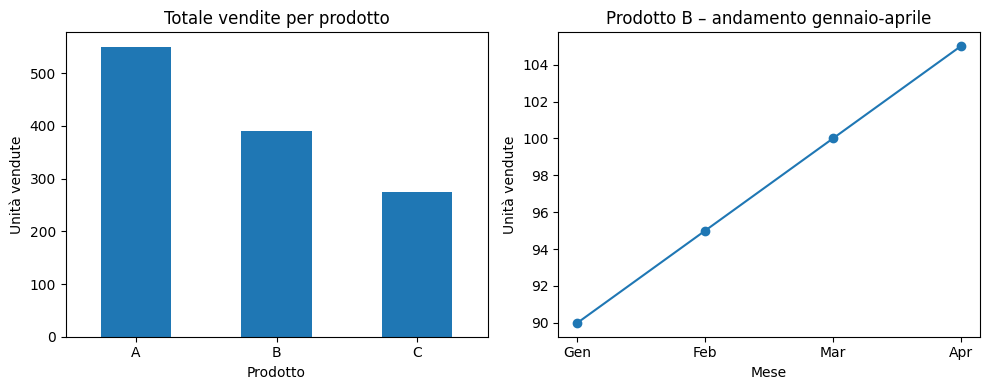

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Subplot 1 – Grafico a barre dei totali
totali.plot(kind="bar", ax=axes[0])
axes[0].set_title("Totale vendite per prodotto")
axes[0].set_ylabel("Unità vendute")
# Setta le etichette dell'asse x in orizzontale
axes[0].set_xlabel("Prodotto")
axes[0].set_xticklabels(totali.index, rotation=0)

# Subplot 2 – Andamento mensile del prodotto B
prod_b = df[df["Prodotto"] == "B"]
axes[1].plot(prod_b["Mese"], prod_b["Quantità"], marker="o")
axes[1].set_title("Prodotto B – andamento gennaio‑aprile")
axes[1].set_ylabel("Unità vendute")
axes[1].set_xlabel("Mese")

plt.tight_layout()
plt.show()

### Challenge facoltativo
1. Calcola il totale per mese

2. Crea un terzo filtro con l’espressione 
> (Prodotto == "A" & Quantità > 130) | (Prodotto == "C" & Quantità < 70)

3. Sostituisci il line plot del secondo subplot con un scatter plot
> axes[1].scatter(prod_b["Mese"], prod_b["Quantità"])

In [34]:
# Calcola il totale per mese
totale_per_mese = df.groupby("Mese")["Quantità"].sum()
# ordina i mesi in ordine cronologico
ordine_mesi = ["Gen", "Feb", "Mar", "Apr"]
totale_per_mese = totale_per_mese.reindex(ordine_mesi)
totale_per_mese

Mese
Gen    270
Feb    295
Mar    320
Apr    330
Name: Quantità, dtype: int64

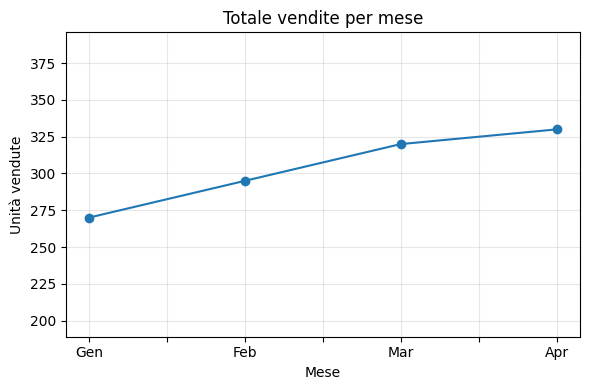

In [38]:
# crea un plot a linee con i totali per mese
totale_per_mese.plot(kind="line", marker="o", figsize=(6, 4))
plt.title("Totale vendite per mese")
plt.xlabel("Mese")
plt.ylabel("Unità vendute")
plt.xticks(rotation=0)  # Etichette dell'asse x in orizzontale
plt.grid(alpha=0.3)
plt.ylim(totale_per_mese.min() *0.7, totale_per_mese.max() * 1.2)  # Aggiunge un margine superiore e inferiore
plt.tight_layout()
plt.show()

In [39]:
# Crea un terzo filtro con l’espressione data
filtered_data=df[(df["Prodotto"] == "A") & (df["Quantità"] > 130) | (df["Prodotto"] == "C") & (df["Quantità"] < 70)]
filtered_data

,Mese,Prodotto,Quantità
1,Feb,A,135
2,Mar,A,150
3,Apr,A,145
8,Gen,C,60
9,Feb,C,65


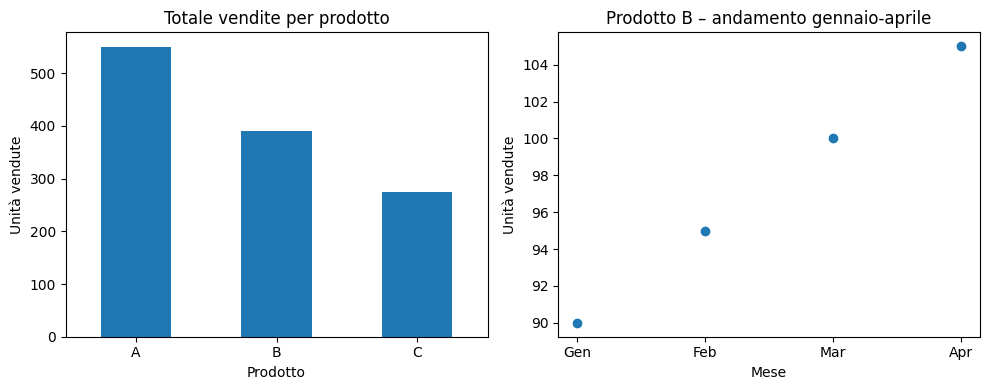

In [40]:
# Sostituisci il line plot del secondo subplot con un scatter plot

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Subplot 1 – Grafico a barre dei totali
totali.plot(kind="bar", ax=axes[0])
axes[0].set_title("Totale vendite per prodotto")
axes[0].set_ylabel("Unità vendute")
# Setta le etichette dell'asse x in orizzontale
axes[0].set_xlabel("Prodotto")
axes[0].set_xticklabels(totali.index, rotation=0)

# Subplot 2 – Andamento mensile del prodotto B
prod_b = df[df["Prodotto"] == "B"]
axes[1].scatter(prod_b["Mese"], prod_b["Quantità"])
axes[1].set_title("Prodotto B – andamento gennaio‑aprile")
axes[1].set_ylabel("Unità vendute")
axes[1].set_xlabel("Mese")

plt.tight_layout()
plt.show()

# Aggiunta personale
Fai un plot con l'andamento delle vendite nei mesi per ogni prodotto

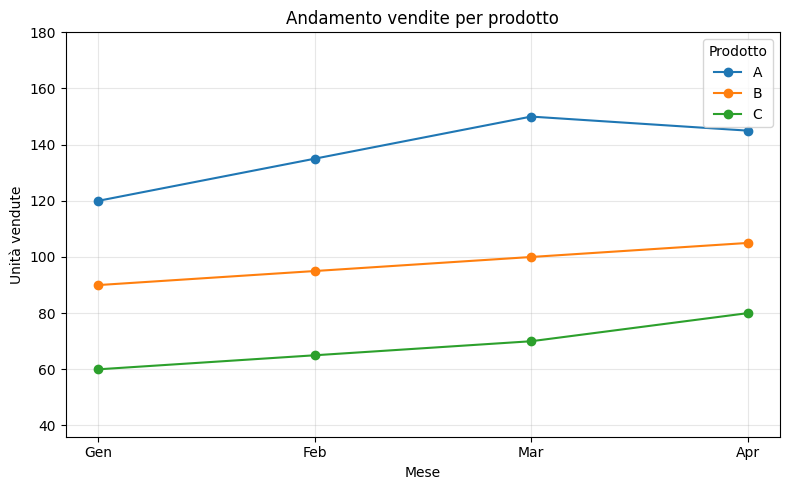

In [48]:
# plot con l'andamento delle vendite nei mesi per ogni prodotto
# riordina i dati in base al mese
df["Mese"] = pd.Categorical(df["Mese"], categories=["Gen", "Feb", "Mar", "Apr"], ordered=True)
df.sort_values(by=["Mese", "Prodotto"], inplace=True)

# plot con l'andamento delle vendite nei mesi per ogni prodotto
plt.figure(figsize=(8, 5))
for prodotto in df["Prodotto"].unique():
    subset = df[df["Prodotto"] == prodotto]
    plt.plot(subset["Mese"], subset["Quantità"], marker="o", label=prodotto)

plt.title("Andamento vendite per prodotto")
plt.xlabel("Mese")
plt.ylabel("Unità vendute")
plt.xticks(rotation=0)  # Etichette dell'asse x in orizzontale
plt.legend(title="Prodotto")
plt.grid(alpha=0.3)
plt.ylim(df["Quantità"].min() * 0.6, df["Quantità"].max() * 1.2)  # Aggiunge un margine superiore
plt.tight_layout()
plt.show()



L'andamento totale delle vendite ha avuto una flessione a causa del prodotto A